# Walmart GeoLocations-Analysis

In [1]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import gmaps
import warnings
warnings.filterwarnings('ignore')
# Google developer API key
from config_walmart import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:
# Target city
target_city = "Boise, Idaho"

# Build the endpoint URL
target_url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s"% (target_city, gkey)

In [3]:
results=requests.get(target_url).json()

In [4]:
results['results'][0]['geometry']['location']


{'lat': 43.6150186, 'lng': -116.2023137}

In [5]:
address='4301,Norwalk Drive'

In [6]:
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.3201459855563 -121.975051690677


In [7]:
url1="https://maps.googleapis.com/maps/api/place/textsearch/json?query=Walmart+stores&key="+gkey

In [8]:
res=requests.get(url1).json()

In [9]:
res

{'html_attributions': [], 'results': [], 'status': 'ZERO_RESULTS'}

In [10]:
target_url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" %("Walmart", gkey)

In [11]:
res1=requests.get(target_url).json()

In [12]:
res1

{'results': [{'address_components': [{'long_name': '4000',
     'short_name': '4000',
     'types': ['street_number']},
    {'long_name': 'Green Country Road',
     'short_name': 'Green Country Rd',
     'types': ['route']},
    {'long_name': 'Bartlesville',
     'short_name': 'Bartlesville',
     'types': ['locality', 'political']},
    {'long_name': 'Washington County',
     'short_name': 'Washington County',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'Oklahoma',
     'short_name': 'OK',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'United States',
     'short_name': 'US',
     'types': ['country', 'political']},
    {'long_name': '74006', 'short_name': '74006', 'types': ['postal_code']}],
   'formatted_address': '4000 Green Country Rd, Bartlesville, OK 74006, USA',
   'geometry': {'location': {'lat': 36.7405194, 'lng': -95.9316181},
    'location_type': 'ROOFTOP',
    'viewport': {'northeast': {'lat': 36.741868380

In [13]:
url2="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=California&format=json"
res2=requests.get(url2).json()
res


{'html_attributions': [], 'results': [], 'status': 'ZERO_RESULTS'}

In [14]:
l=[]
for i in res2:
    l.append(reversed(i['coordinates']))

In [15]:

fig = gmaps.figure(map_type='SATELLITE')
# generate some (latitude, longitude) pairs
locations =l
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
df=json_normalize(res2)
df

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,Fairfield,"[-122.0352432, 38.2790814]",US,Fairfield Supercenter,2048,707-428-4792,CA,2701 N Texas St,True,PST,94533
1,Ukiah,"[-123.196989, 39.133706]",US,Ukiah Store,2052,707-468-0258,CA,1155 Airport Park Blvd,True,PST,95482
2,Willows,"[-122.21772, 39.525898]",US,Willows Supercenter,2053,530-934-2054,CA,470 N Airport Rd,True,PST,95988
3,Long Beach,"[-118.147723, 33.86142]",US,Long Beach Supercenter,4101,424-296-6525,CA,3705 E South St,True,PST,90805
4,Jackson,"[-120.806192, 38.35793]",US,Jackson Store,2054,209-223-5384,CA,10355 Wicklow Way,True,PST,95642
5,Sacramento,"[-121.369026, 38.482677]",US,Sacramento Supercenter,3081,916-897-5020,CA,8915 Gerber Road,True,PST,95829
6,West Covina,"[-117.90785439, 34.07840363]",US,West Covina FedEx Pickup Location,93195,626-966-4850,CA,467 N Azusa Ave,True,PST,91791
7,Sacramento,"[-121.50551605, 38.63882446]",US,Sacramento FedEx Pickup Location,91146,916-515-1306,CA,3810 Truxel Rd,True,PST,95834
8,Escondido,"[-117.0629723, 33.1300697]",US,Escondido Neighborhood Market,3084,760-871-6760,CA,1266 East Valley Parkway,True,PST,92027
9,Anderson,"[-122.289703, 40.431344]",US,Anderson Supercenter,5133,530-378-0244,CA,5000 Rhonda Rd,True,PST,96007


In [21]:
m=[]
x=[]
locat=[df['coordinates'][1],df[][0]]
j=0
for i in locat:
    print(i)

KeyError: 1

In [20]:
fig = gmaps.figure()
markers = gmaps.marker_layer(locat)
fig.add_layer(markers)
fig

TypeError: object of type 'reversed' has no len()

In [19]:
l1=pd.DataFrame(df.groupby('city').sum())
#l1.sort_values(by='0',ascending=False)

In [20]:
l1=l1.reset_index()
l2=l1.sort_values(by='sundayOpen',ascending=False)

In [21]:
l2.head()

,city,no,sundayOpen
120,Los Angeles,1861030,20.0
200,San Francisco,1683439,18.0
199,San Diego,1126749,18.0
195,Sacramento,763389,14.0
202,San Jose,763384,14.0


In [22]:
url3="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=SanJose&format=json"
res3=requests.get(url3).json()
df1=json_normalize(res3)
df2=df1['name']
t=len(df2)
sc=0
s=0
nm=0
city='San Jose'
for i in df2:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

Total number of Walmarts in San Jose:29
Total number of Supercenters:12
Total number of Stores:10
Total number of Neighborhood Markets:7


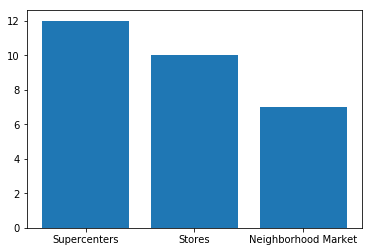

In [23]:
import matplotlib.pyplot as plt
x=["Supercenters","Stores","Neighborhood Market"]
y=[sc,s,nm]
plt.bar(x,y)
plt.show()

In [24]:
city1=input("Enter the name of the city : ")


Enter the name of the city : San Jose


In [34]:
url4="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=SanJose&format=json"
print(city1)
res4=requests.get(url4).json()
dff=json_normalize(res4)
print(dff)
dff2=dff['name']
t=len(dff2)
sc=0
s=0
nm=0
city='San Jose'
for i in dff2:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city1}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

San Jose
             city                 coordinates country  \
0        San Jose    [-121.860387, 37.331034]      US   
1        San Jose     [-121.871095, 37.31621]      US   
2        San Jose    [-121.973182, 37.321668]      US   
3        San Jose    [-121.880176, 37.255456]      US   
4        San Jose    [-121.773066, 37.313558]      US   
5        San Jose      [-121.9887, 37.291593]      US   
6     Santa Clara  [-121.9855022, 37.3900085]      US   
7        Milpitas    [-121.921182, 37.431416]      US   
8         Fremont    [-121.943195, 37.511302]      US   
9   Mountain View    [-122.109748, 37.400846]      US   
10        Fremont    [-121.985626, 37.520242]      US   
11    Morgan Hill    [-121.655172, 37.149211]      US   
12     Union City    [-122.067306, 37.604711]      US   
13     Pleasanton    [-121.876915, 37.689975]      US   
14     Pleasanton    [-121.887338, 37.698323]      US   
15      Livermore    [-121.767991, 37.699249]      US   
16      San Ramon    [

In [30]:
dff

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.860387, 37.331034]",US,San Jose Supercenter,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
1,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
2,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
3,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
4,San Jose,"[-121.773066, 37.313558]",US,San Jose Neighborhood Market,3023,408-826-0338,CA,4055 Evergreen Village Sq Ste 140,True,PST,95135
5,San Jose,"[-121.9887, 37.291593]",US,San Jose Neighborhood Market,3025,408-796-3823,CA,1600 Saratoga Ave Unit 501,True,PST,95129
6,Santa Clara,"[-121.9855022, 37.3900085]",US,Santa Clara Neighborhood Market,3123,408-961-3599,CA,3255 Mission College Blvd,True,PST,95054
7,Milpitas,"[-121.921182, 37.431416]",US,Milpitas Supercenter,2119,408-934-0304,CA,301 Ranch Dr,True,PST,95035
8,Fremont,"[-121.943195, 37.511302]",US,Fremont Store,2989,510-651-3301,CA,44009 Osgood Rd,True,PST,94539
9,Mountain View,"[-122.109748, 37.400846]",US,Mountain View Store,2280,650-917-0796,CA,600 Showers Dr,True,PST,94040
